# Figure 7 - Cell-type-specific behavior maps

Create (DC x amplitude) behavior maps of RS and LTS neurons at various pulse repetition frequencies, along with characteristic Q-V traces, from SONIC model predictions.

### Imports

In [1]:
import os
import logging
import numpy as np
import matplotlib.pyplot as plt
from PySONIC.utils import logger
from PySONIC.neurons import getPointNeuron
from PySONIC.plt import cm2inch, FiringRateMap
from utils import subdirectory, codes, saveFigsAsPDF

logger.setLevel(logging.INFO)

### Functions

In [2]:
def plotMapAndTraces(subdir, pneuron, a, Fdrive, tstim, amps, PRF, DCs, cov,
                     FRbounds=None, thresholds=True, insets=None, tbounds=None,
                     Vbounds=None, map_figsize=None, trace_figsize=None, fs=8, lw=1):

    mapcodes = codes(a, pneuron, Fdrive, PRF, tstim)
    subsubdir = os.path.join(subdir, ' '.join(mapcodes))
    if not os.path.isdir(subsubdir):
        os.mkdir(subsubdir)
    figs = {}

    # FR map
    frmap = FiringRateMap(subsubdir, pneuron, a, 1., Fdrive, tstim, PRF, amps, DCs)
    frmap.run(mpi=True)
    mapfig = frmap.render(
        zbounds=FRbounds, thresholds=thresholds, mpi=True, figsize=map_figsize, fs=fs, insets=insets)
    figs['map_' + '_'.join(mapcodes)] = mapfig

    # Related inset traces
    for inset in insets:
        DC, Adrive = inset[:2]
        tracefig = frmap.plotTimeseries(DC, Adrive, fs=fs, patches='none')
        tracefig.set_size_inches(trace_figsize)
        ax = tracefig.axes[0]
        if tbounds is not None:
            ax.set_xlim(tbounds)
        if Vbounds is not None:
            ax.set_ylim(Vbounds)
        ax.set_title(f'DC = {DC:.0f}%, A = {Adrive:.1f} kPa', pad=10.0, fontsize=fs)
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=fs)
        figcode = 'VQ trace {} {:.1f}kPa {:.0f}%DC'.format(pneuron.name, Adrive, DC)
        figs[figcode] = tracefig

    return figs

### Data sub-directory

In [3]:
subdir = subdirectory('maps')

### Plot parameters

In [4]:
figindex = 7
pltargs = {
    'map_figsize': cm2inch(16, 11.6),
    'trace_figsize': cm2inch(14, 6),
    'fs': 14,
    'lw': 2,
    'FRbounds': (1e0, 1e3),  # Hz
    'tbounds': (-10, 240.),  # s
    'Vbounds': (-200, 50),  # mV
    'thresholds': True
}
figs = {}

### Simulation parameters

In [5]:
a = 32e-9       # m
Fdrive = 500e3  # Hz
tstim = 1.0     # s
cov = 1.0
amps = np.logspace(np.log10(10), np.log10(600), num=30) * 1e3  # Pa
DCs = np.arange(1, 101) * 1e-2
sim_args = lambda pneuron, PRF: [subdir, pneuron, a, Fdrive, tstim, amps, PRF, DCs, cov]

## 10 Hz PRF

In [6]:
subindex = 'a'
PRF = 1e1  # Hz

### RS neuron

 01/05/2020 20:25:37: Firing rate range: 2 - 799 Hz
 01/05/2020 20:25:42: File "ASTIM_RS_PW_32nm_f_500kHz_A_126.96kPa_tstim_1s_PRF_10.00Hz_DC_28.0%_sonic.pkl" already present in directory "C:\Users\lemaire\Documents\SONIC paper data\maps\RS 32nm 500kHz PRF10Hz 1s" -> preserving
 01/05/2020 20:25:42: Loading data from "ASTIM_RS_PW_32nm_f_500kHz_A_126.96kPa_tstim_1s_PRF_10.00Hz_DC_28.0%_sonic.pkl"
 01/05/2020 20:25:42: File "ASTIM_RS_PW_32nm_f_500kHz_A_168.39kPa_tstim_1s_PRF_10.00Hz_DC_37.0%_sonic.pkl" already present in directory "C:\Users\lemaire\Documents\SONIC paper data\maps\RS 32nm 500kHz PRF10Hz 1s" -> preserving
 01/05/2020 20:25:42: Loading data from "ASTIM_RS_PW_32nm_f_500kHz_A_168.39kPa_tstim_1s_PRF_10.00Hz_DC_37.0%_sonic.pkl"
C:\Users\lemaire\Anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


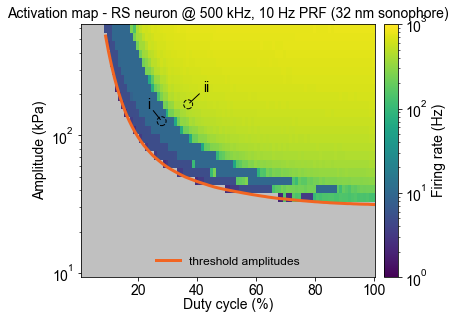

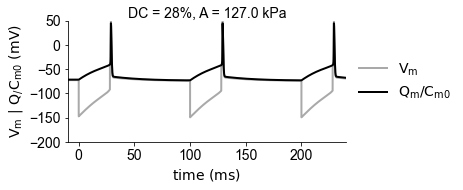

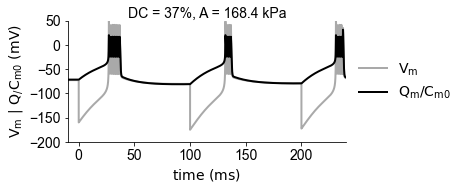

In [7]:
pneuron = getPointNeuron('RS')
insets = [(28., 126.96, 'i', 'ul'), (37., 168.39, 'ii', 'ur')]
out = plotMapAndTraces(*sim_args(pneuron, PRF), insets=insets, **pltargs)
figs.update({f'{subindex}_{k}': v for k, v in out.items()})

### LTS neuron

 01/05/2020 20:25:43: Firing rate range: 2 - 654 Hz
 01/05/2020 20:25:48: File "ASTIM_LTS_PW_32nm_f_500kHz_A_47.26kPa_tstim_1s_PRF_10.00Hz_DC_08.0%_sonic.pkl" already present in directory "C:\Users\lemaire\Documents\SONIC paper data\maps\LTS 32nm 500kHz PRF10Hz 1s" -> preserving
 01/05/2020 20:25:48: Loading data from "ASTIM_LTS_PW_32nm_f_500kHz_A_47.26kPa_tstim_1s_PRF_10.00Hz_DC_08.0%_sonic.pkl"
 01/05/2020 20:25:49: File "ASTIM_LTS_PW_32nm_f_500kHz_A_146.22kPa_tstim_1s_PRF_10.00Hz_DC_30.0%_sonic.pkl" already present in directory "C:\Users\lemaire\Documents\SONIC paper data\maps\LTS 32nm 500kHz PRF10Hz 1s" -> preserving
 01/05/2020 20:25:49: Loading data from "ASTIM_LTS_PW_32nm_f_500kHz_A_146.22kPa_tstim_1s_PRF_10.00Hz_DC_30.0%_sonic.pkl"
C:\Users\lemaire\Anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


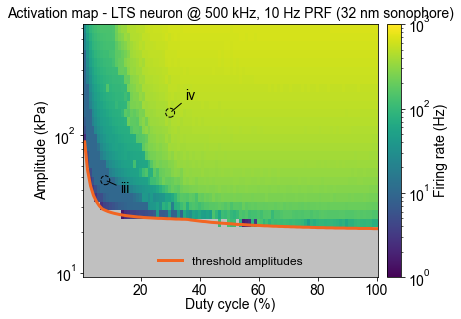

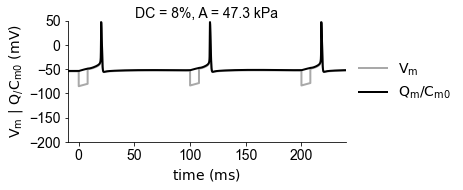

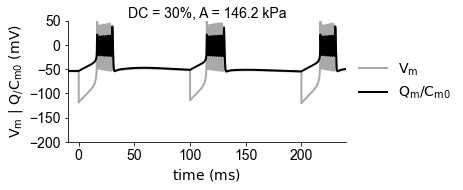

In [8]:
pneuron = getPointNeuron('LTS')
insets = [(8, 47.26, 'iii', 'lr'), (30, 146.22, 'iv', 'ur')]
out = plotMapAndTraces(*sim_args(pneuron, PRF), insets=insets, **pltargs)
figs.update({f'{subindex}_{k}': v for k, v in out.items()})

## 100 Hz PRF

In [9]:
subindex = 'b'
PRF = 1e2  # Hz

### RS neuron

 01/05/2020 20:25:50: Firing rate range: 2 - 810 Hz
 01/05/2020 20:25:55: File "ASTIM_RS_PW_32nm_f_500kHz_A_452.40kPa_tstim_1s_PRF_100.00Hz_DC_51.0%_sonic.pkl" already present in directory "C:\Users\lemaire\Documents\SONIC paper data\maps\RS 32nm 500kHz PRF100Hz 1s" -> preserving
 01/05/2020 20:25:55: Loading data from "ASTIM_RS_PW_32nm_f_500kHz_A_452.40kPa_tstim_1s_PRF_100.00Hz_DC_51.0%_sonic.pkl"
 01/05/2020 20:25:55: File "ASTIM_RS_PW_32nm_f_500kHz_A_452.40kPa_tstim_1s_PRF_100.00Hz_DC_56.0%_sonic.pkl" already present in directory "C:\Users\lemaire\Documents\SONIC paper data\maps\RS 32nm 500kHz PRF100Hz 1s" -> preserving
 01/05/2020 20:25:55: Loading data from "ASTIM_RS_PW_32nm_f_500kHz_A_452.40kPa_tstim_1s_PRF_100.00Hz_DC_56.0%_sonic.pkl"
C:\Users\lemaire\Anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


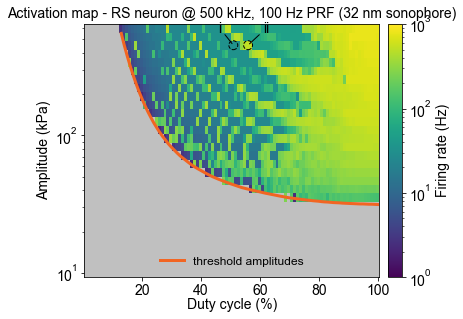

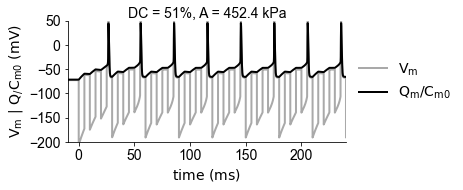

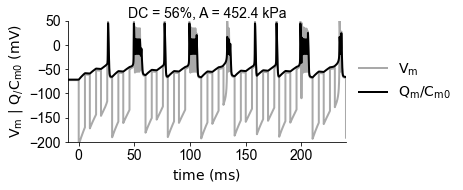

In [10]:
pneuron = getPointNeuron('RS')
insets = [(51, 452.40, 'i', 'ul'), (56, 452.40, 'ii', 'ur')]
out = plotMapAndTraces(*sim_args(pneuron, PRF), insets=insets, **pltargs)
figs.update({f'{subindex}_{k}': v for k, v in out.items()})

### LTS neuron

 01/05/2020 20:25:56: Firing rate range: 2 - 656 Hz
 01/05/2020 20:26:02: File "ASTIM_LTS_PW_32nm_f_500kHz_A_193.92kPa_tstim_1s_PRF_100.00Hz_DC_13.0%_sonic.pkl" already present in directory "C:\Users\lemaire\Documents\SONIC paper data\maps\LTS 32nm 500kHz PRF100Hz 1s" -> preserving
 01/05/2020 20:26:02: Loading data from "ASTIM_LTS_PW_32nm_f_500kHz_A_193.92kPa_tstim_1s_PRF_100.00Hz_DC_13.0%_sonic.pkl"
 01/05/2020 20:26:03: File "ASTIM_LTS_PW_32nm_f_500kHz_A_257.19kPa_tstim_1s_PRF_100.00Hz_DC_43.0%_sonic.pkl" already present in directory "C:\Users\lemaire\Documents\SONIC paper data\maps\LTS 32nm 500kHz PRF100Hz 1s" -> preserving
 01/05/2020 20:26:03: Loading data from "ASTIM_LTS_PW_32nm_f_500kHz_A_257.19kPa_tstim_1s_PRF_100.00Hz_DC_43.0%_sonic.pkl"
C:\Users\lemaire\Anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


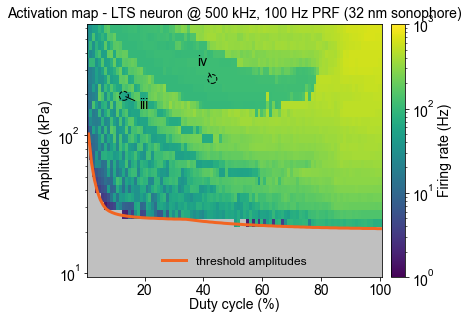

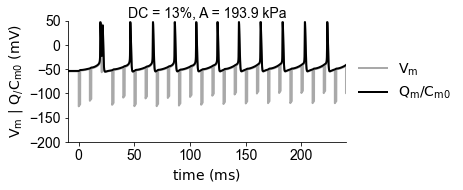

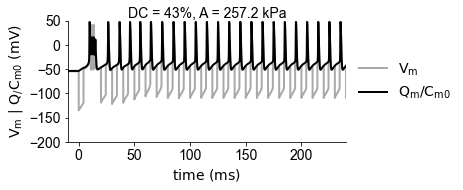

In [11]:
pneuron = getPointNeuron('LTS')
insets = [(13, 193.92, 'iii', 'lr'), (43, 257.19, 'iv', 'ul')]
out = plotMapAndTraces(*sim_args(pneuron, PRF), insets=insets, **pltargs)
figs.update({f'{subindex}_{k}': v for k, v in out.items()})

## 1 kHz PRF

In [12]:
subindex = 'c'
PRF = 1e3  # Hz

### RS neuron

 01/05/2020 20:26:04: Firing rate range: 3 - 1017 Hz
 01/05/2020 20:26:04: Maximal Firing rate (1017 Hz) is above defined upper bound (1000 Hz)
 01/05/2020 20:26:09: File "ASTIM_RS_PW_32nm_f_500kHz_A_110.25kPa_tstim_1s_PRF_1.00kHz_DC_40.0%_sonic.pkl" already present in directory "C:\Users\lemaire\Documents\SONIC paper data\maps\RS 32nm 500kHz PRF1kHz 1s" -> preserving
 01/05/2020 20:26:09: Loading data from "ASTIM_RS_PW_32nm_f_500kHz_A_110.25kPa_tstim_1s_PRF_1.00kHz_DC_40.0%_sonic.pkl"
 01/05/2020 20:26:10: File "ASTIM_RS_PW_32nm_f_500kHz_A_193.92kPa_tstim_1s_PRF_1.00kHz_DC_64.0%_sonic.pkl" already present in directory "C:\Users\lemaire\Documents\SONIC paper data\maps\RS 32nm 500kHz PRF1kHz 1s" -> preserving
 01/05/2020 20:26:10: Loading data from "ASTIM_RS_PW_32nm_f_500kHz_A_193.92kPa_tstim_1s_PRF_1.00kHz_DC_64.0%_sonic.pkl"
C:\Users\lemaire\Anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


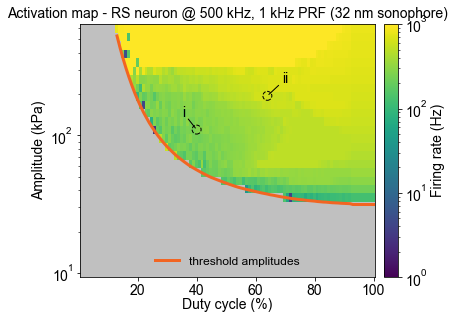

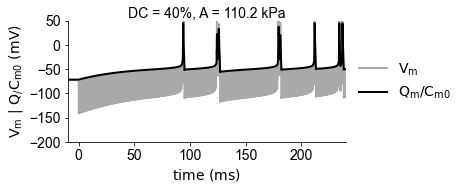

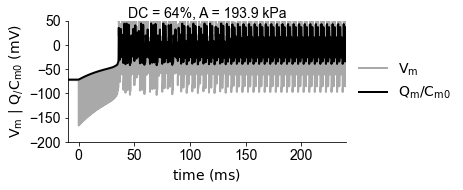

In [13]:
pneuron = getPointNeuron('RS')
insets = [(40, 110.25, 'i', 'ul'), (64, 193.92, 'ii', 'ur')]
out = plotMapAndTraces(*sim_args(pneuron, PRF), insets=insets, **pltargs)
figs.update({f'{subindex}_{k}': v for k, v in out.items()})

### LTS neuron

 01/05/2020 20:26:10: Firing rate range: 2 - 728 Hz
 01/05/2020 20:26:16: File "ASTIM_LTS_PW_32nm_f_500kHz_A_47.26kPa_tstim_1s_PRF_1.00kHz_DC_10.0%_sonic.pkl" already present in directory "C:\Users\lemaire\Documents\SONIC paper data\maps\LTS 32nm 500kHz PRF1kHz 1s" -> preserving
 01/05/2020 20:26:16: Loading data from "ASTIM_LTS_PW_32nm_f_500kHz_A_47.26kPa_tstim_1s_PRF_1.00kHz_DC_10.0%_sonic.pkl"
 01/05/2020 20:26:16: File "ASTIM_LTS_PW_32nm_f_500kHz_A_168.39kPa_tstim_1s_PRF_1.00kHz_DC_53.0%_sonic.pkl" already present in directory "C:\Users\lemaire\Documents\SONIC paper data\maps\LTS 32nm 500kHz PRF1kHz 1s" -> preserving
 01/05/2020 20:26:16: Loading data from "ASTIM_LTS_PW_32nm_f_500kHz_A_168.39kPa_tstim_1s_PRF_1.00kHz_DC_53.0%_sonic.pkl"
C:\Users\lemaire\Anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


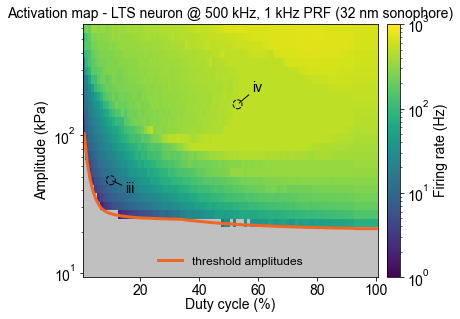

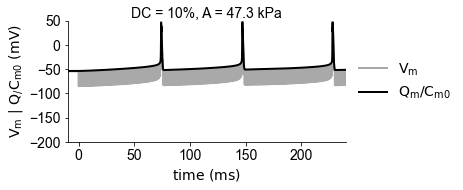

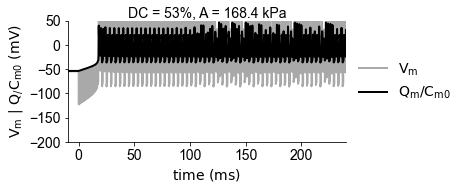

In [14]:
pneuron = getPointNeuron('LTS')
insets = [(10, 47.26, 'iii', 'lr'), (53, 168.39, 'iv', 'ur')]
out = plotMapAndTraces(*sim_args(pneuron, PRF), insets=insets, **pltargs)
figs.update({f'{subindex}_{k}': v for k, v in out.items()})

### Save figure panels

Save figure panels as **pdf** in the *figs* sub-folder:

In [15]:
saveFigsAsPDF(figs, figindex)